In [251]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [205]:
data = pd.read_csv('exams.csv')
#print(data.head())

numeric_data = data.replace(['male', 'female'], [0,1])
numeric_data = numeric_data.replace(['group A', 'group B', 'group C', 'group D', 'group E'], [0,1,2,3,4])
numeric_data = numeric_data.replace(['some high school', 'high school', 'some college', "associate's degree"
                                     , "bachelor's degree", "master's degree"], [0,1,2,3,4,5])
numeric_data = numeric_data.replace(['free/reduced', 'standard'], [0,1])
numeric_data = numeric_data.replace(['none', 'completed'], [0,1])
numeric_data = numeric_data.values

numeric_scores = numeric_data[:,5:8]
features = np.zeros((len(numeric_data),5))
numeric_data = np.append(numeric_data,features,1)
j=1
for i in range(len(numeric_data)):
    if numeric_data[i][j] == 'group A':
        numeric_data[i][8:13] = [1,0,0,0,0]
    if numeric_data[i][j] == 'group B':
        numeric_data[i][8:13] = [0,1,0,0,0]
    if numeric_data[i][j] == 'group C':
        numeric_data[i][8:13] = [0,0,1,0,0]
    if numeric_data[i][j] == 'group D':
        numeric_data[i][8:13] = [0,0,0,1,0] 
    if numeric_data[i][j] == 'group E':
        numeric_data[i][8:13] = [0,0,0,0,1] 

#eliminate original race columns
numeric_data = np.delete(numeric_data, 1, 1)
numeric_data.astype(float)


#eliminate individual scores
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
numeric_data = np.delete(numeric_data,4,1)
    

combined_score = []
for i in range(len(numeric_scores[:, 0])):
    score = numeric_scores[i, 0]+numeric_scores[i, 1]+numeric_scores[i, 2]
    combined_score.append(score)

combined_score_df = pd.DataFrame({'combined_score': combined_score})
#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, combined_score_df, axis=1)
#print(numeric_data)

threshold = 210 #average of 70% per test

passed = []
for i in range(len(numeric_scores[:, 0])):
    temp = combined_score[i]
    if(temp>=threshold):
        passed.append(1)
    else:
        passed.append(0)
        
passed_df = pd.DataFrame({'passed': passed})

#numeric_data.join(combined_score_df)
#numeric_data = np.append(numeric_data, passed_df, axis=1)
#print(passed)

X = numeric_data
print(len(X))
y = passed_df
#print(combined_score_df)

15000
15000


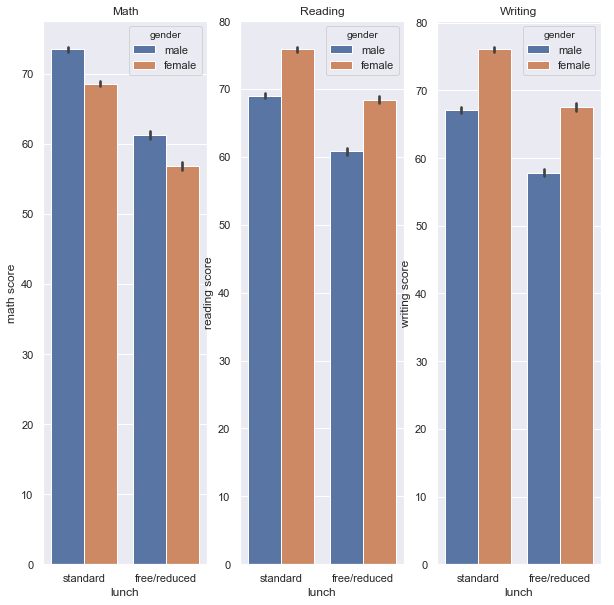

In [82]:
#plot lunch against diff sub scores with gender

figure(figsize=(10,10))
plt.subplot(1, 3, 1)
sns.barplot(x='lunch',y='math score',data=data,hue='gender')
plt.title('Math')
plt.subplot(1, 3, 2)
sns.barplot(x='lunch',y='reading score',data=data,hue='gender')
plt.title('Reading')
plt.subplot(1, 3, 3)
sns.barplot(x='lunch',y='writing score',data=data,hue='gender')
plt.title('Writing')
plt.show()

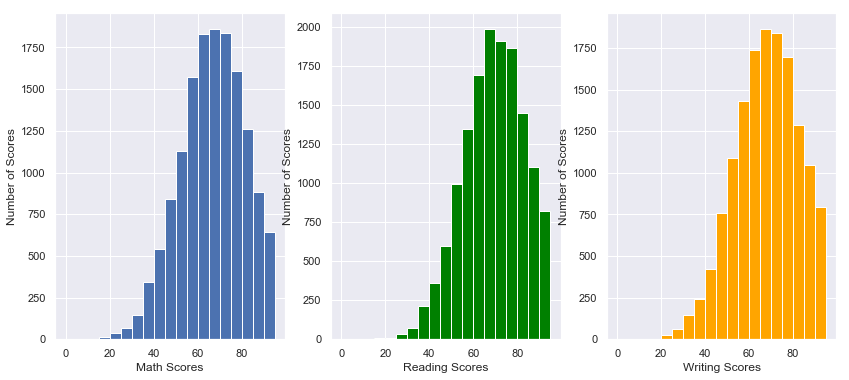

In [83]:
#plot to show distribution of test scores

bins = np.arange(start=0, stop=100, step=5)

plt.subplot(1, 3, 1)
data['math score'].hist(bins=bins, figsize=[14,6])
plt.xlabel("Math Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 2)
data['reading score'].hist(bins=bins, figsize=[14,6], color='green')
plt.xlabel("Reading Scores")
plt.ylabel("Number of Scores")
plt.subplot(1, 3, 3)
data['writing score'].hist(bins=bins, figsize=[14,6], color='orange')
plt.xlabel("Writing Scores")
plt.ylabel("Number of Scores")
plt.show()

P    10305
F     4695
Name: math_pass, dtype: int64


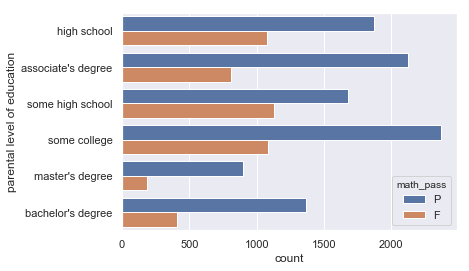

In [84]:
#set data so those with above 60 on math test pass and then plot with parents degree

data['math_pass'] = np.where(data['math score']<60, 'F', 'P')
print(data.math_pass.value_counts())

p = sns.countplot(y='parental level of education', data = data, hue='math_pass')

P    11374
F     3626
Name: reading_pass, dtype: int64


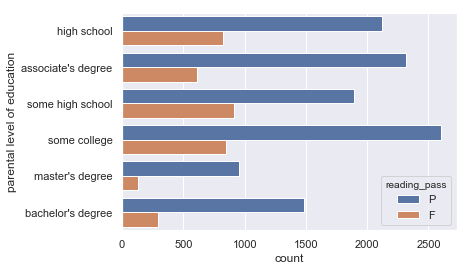

In [85]:
#set data so those with above 60 on reading test pass and then plot with parents degree

data['reading_pass'] = np.where(data['reading score']<60, 'F', 'P')
print(data.reading_pass.value_counts())

p = sns.countplot(y='parental level of education', data = data, hue='reading_pass')

P    10821
F     4179
Name: writing_pass, dtype: int64


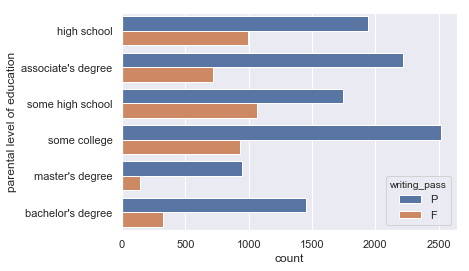

In [86]:
#set data so those with above 60 on math test pass and then plot with parents degree

data['writing_pass'] = np.where(data['writing score']<60, 'F', 'P')
print(data.writing_pass.value_counts())

p = sns.countplot(y='parental level of education', data =data, hue='writing_pass')

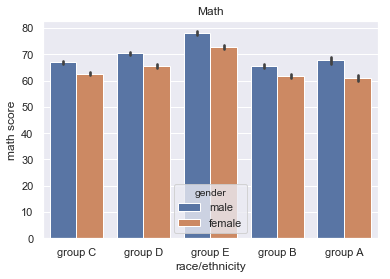

In [87]:
#plots to check if race has any effect

sns.barplot(x='race/ethnicity',y='math score',data=data,hue='gender')
plt.title('Math')

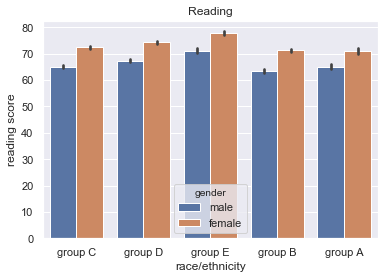

In [88]:
sns.barplot(x='race/ethnicity',y='reading score',data=data,hue='gender')
plt.title('Reading')

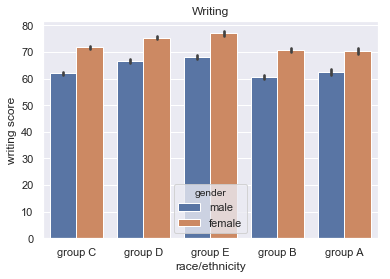

In [89]:
sns.barplot(x='race/ethnicity',y='writing score',data=data,hue='gender')
plt.title('Writing')

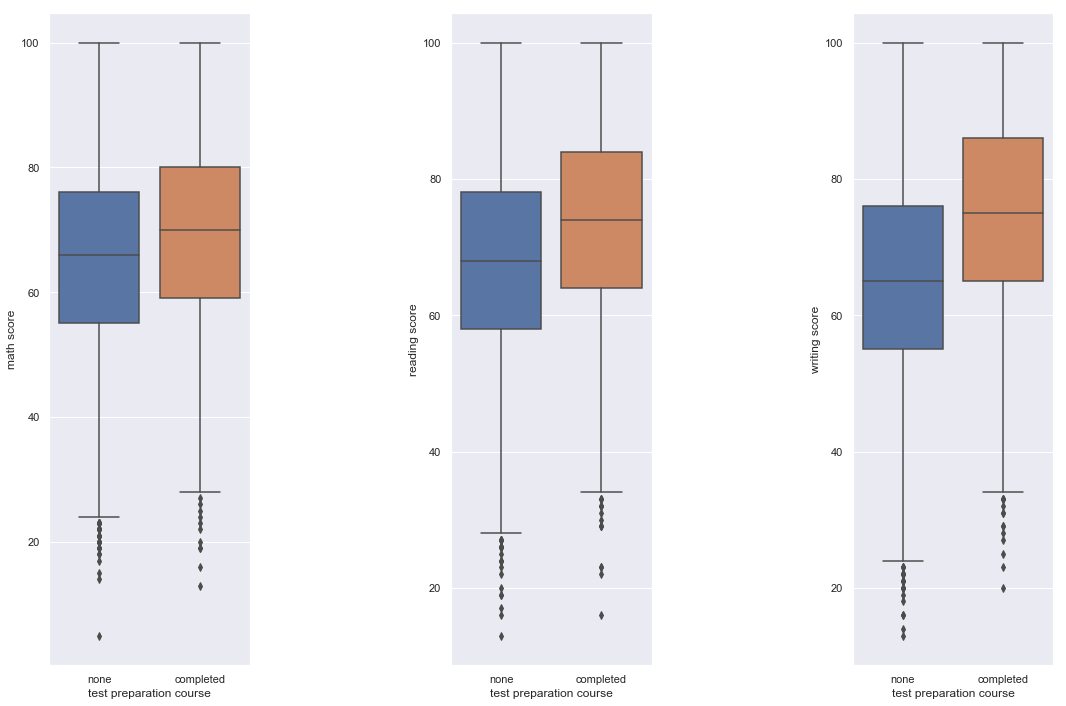

In [109]:
#plot to see how test score effected 

fig, axs = plt.subplots(ncols=3,figsize=(18,12))
plt.subplots_adjust(wspace=1);
sns.boxplot(x="test preparation course", y="math score", data=data,ax=axs[0]);
sns.boxplot(x="test preparation course", y="reading score", data=data, ax=axs[1]);
sns.boxplot(x="test preparation course", y="writing score", data=data, ax=axs[2]);

In [201]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10050, 9)
(4950, 9)
(10050, 1)
(4950, 1)


In [153]:
#fit base logreg model
model = LogisticRegression(solver='lbfgs')
%time model.fit(X_train, Y_train.values.ravel())

y_pred_log = model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

CPU times: user 63.6 ms, sys: 3.94 ms, total: 67.5 ms
Wall time: 40.5 ms
Training Accuracy : 0.662885572139
Testing Accuracy : 0.649090909091


In [154]:
#preform grid search to hypertune parameters
model2 = LogisticRegression()
param_grid = [
  {"C":np.logspace(-3,3,7), 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
  {'penalty': ['l2'], 'solver': ['lbfgs', 'sag', 'newton-cg']},
 ]

#fit parameters and preform grid search
grid = GridSearchCV(model2, param_grid, cv=5, scoring = 'accuracy', )
tuned = grid.fit(X_train,Y_train.values.ravel())

#find best parameters and score
print("tuned hpyerparameters :(best parameters) ",tuned.best_params_)
print("accuracy :",tuned.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.10000000000000001, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.661890547264


In [155]:
#new tuned model
tuned = LogisticRegression(C=0.10000000000000001, penalty='l1', solver='saga')
tuned.fit(X_train, Y_train.values.ravel())
y_pred_tuned = tuned.predict(X_test)

#print(tuned.get_params())

# calculating the classification accuracies
print("Tuned Training Accuracy :", tuned.score(X_train, Y_train))
print("Tunded Testing Accuracy :", tuned.score(X_test, Y_test))

Tuned Training Accuracy : 0.662885572139
Tunded Testing Accuracy : 0.649090909091


In [248]:
#acc, prec and recall for tuned model
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_tuned))
print("Precision:",metrics.precision_score(Y_test, y_pred_tuned))
print("Recall:",metrics.recall_score(Y_test, y_pred_tuned))

#confusion matrix
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.649090909091
Precision: 0.643062200957
Recall: 0.575588865096
[[1880  735]
 [1001 1334]]


In [260]:
#create rf with some intial parameters and fit
rF = RandomForestClassifier(n_estimators=100,max_depth=6,
                             random_state=0)
rF.fit(X_train, Y_train.values.ravel())  
y_pred=rF.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy :", rF.score(X_train, Y_train))
print("Testing Accuracy :", rF.score(X_test, Y_test))

#obtain important features they are in order of printed:
#gender, parental of education, lunch, and test prep.
#Lunch is the most important then test prep, then parental education and then gender
#but just a little
print(rF.feature_importances_)

Training Accuracy : 0.663084577114
Testing Accuracy : 0.649292929293
[ 0.08163899  0.2379188   0.44187195  0.23857026  0.          0.          0.
  0.          0.        ]


In [ ]:
#code snipper to hypertune forest taken from:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min


In [249]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [259]:
#testing the new tuned model

rf_tuned = RandomForestClassifier(n_estimators=400,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features='sqrt',
 max_depth=30,
 bootstrap=True)

rf_tuned.fit(X_train, Y_train.values.ravel()) 

print("Training Accuracy :", rf_tuned.score(X_train, Y_train))
print("Testing Accuracy :", rf_tuned.score(X_test, Y_test))


Training Accuracy : 0.663184079602
Testing Accuracy : 0.648888888889
